## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Multivariate LR

In [2]:
df = pd.read_csv('MultipleLR.csv', header=None)
x = df.to_numpy()
y = x[:, [-1]]

x = np.block([np.ones((x.shape[0],1)), x[:,0:-1]])
print(y.shape)
print(x.shape)

(25, 1)
(25, 4)


### Main Functions 

In [3]:
def initialization(x):
    costs, thetas = [], []
    n = x.shape[1]
    theta = np.zeros((n, 1))
    return n, theta, costs, thetas
    
def h(x, theta) : 
    y_pred = x @ theta
    return y_pred

def cost(n, e):
    loss = (1/(2* n))*(e.T @ e)[0][0] #why [0][0] 
    return loss

def calc_gradient(n, x, e):
    D_theta = x.T @ e * (1/n)
    return D_theta 
    
def thetaVSloss(thetas_ls, costs):
    thetas_ls = np.squeeze(thetas_ls)
    n, m = thetas_ls.shape
    fig, a =  plt.subplots(1, m, figsize=(20, 5))
    for i, th in enumerate(thetas_ls.T):
        a[i].plot(th, costs)
        a[i].scatter(th, costs, marker='o', color='orange')
        a[i].set(xlabel=f"theta{i+1}", ylabel='cost')
    print(n, m)

# Stochastic Gradient Descent

In [4]:
def StochasticGD(x, y, alpha, it):
    n, theta, costs, thetas = initialization(x)
    
    for i in range (it): 
        for j in range (0, n):
            #1. calc h(x)
            y_pred = h(x, theta)   

            #2. j(theta0, theta1)
            e = (y_pred - y)
            loss = cost(n, e)
            # costs.append(loss)    
    
            #3. calc deta thetas
            D_theta = calc_gradient(n, x, e)

            #4. get the direction and update 
            theta = theta - alpha * D_theta 
        err = h(x, theta) - y 
        epoch_loss = cost(len(err), err)
        # print("epoch_loss", epoch_loss)
        costs.append(epoch_loss)
        thetas.append(theta)
         
    return thetas, costs, thetas[-1]


In [5]:
thetas, costs, theta  = StochasticGD(x, y, 0.00001, 1000)
r = r2_score(y, h(x, theta))
print(r)

0.989005325967423


Text(0.5, 0, 'theta')

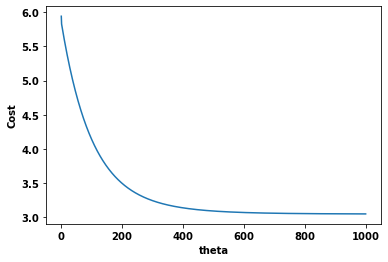

In [6]:
plt.plot(costs)
plt.ylabel("Cost")
plt.xlabel("theta")

1000 4


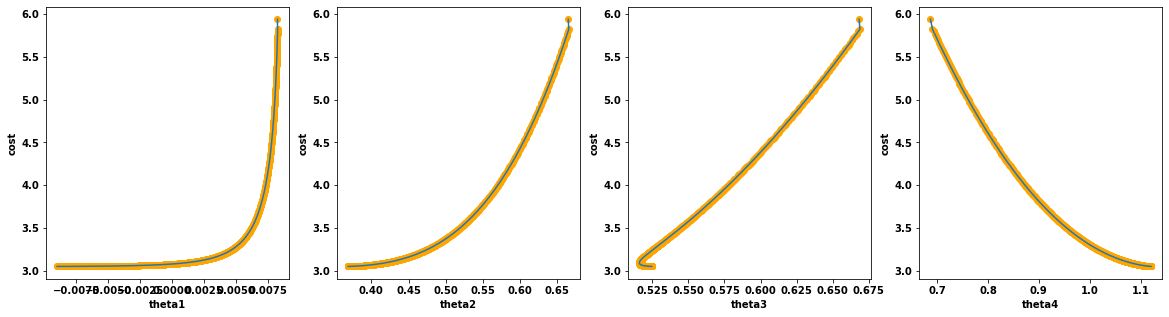

In [7]:
thetaVSloss(thetas, costs)